#### Label Image

--- Image Relabeling Script ---
Enter the correct number for the label.
Press 'Enter' if the label is correct.
Type 'quit' to save and exit.
---------------------------------


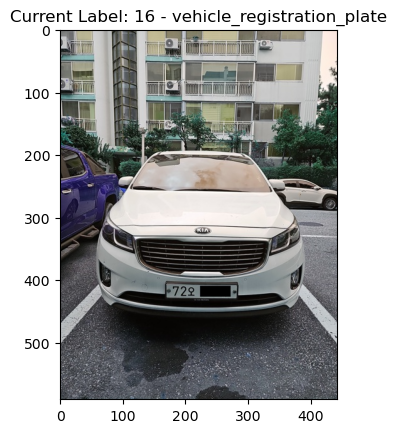

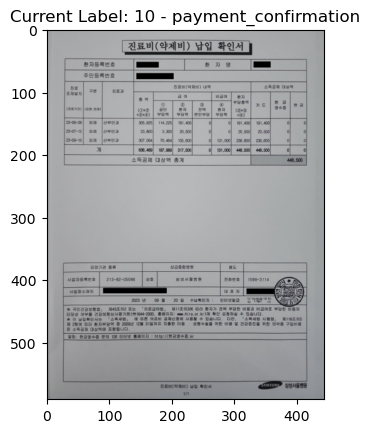

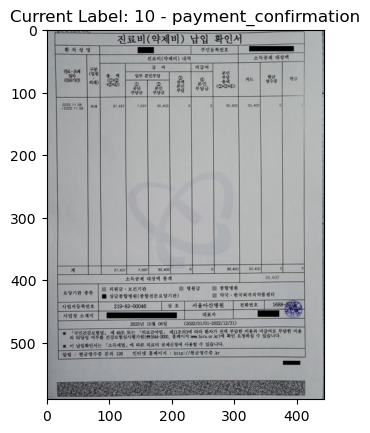

KeyboardInterrupt: Interrupted by user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- Setup ---
IMAGE_DIR = 'train/'
CSV_PATH = 'train.csv'
META_PATH = 'meta.csv'
OUTPUT_CSV_PATH = 'train_corrected.csv'

# Load data
df = pd.read_csv(CSV_PATH)
meta_df = pd.read_csv(META_PATH)
class_map = pd.Series(meta_df.class_name.values, index=meta_df.target).to_dict()

# Create a copy to store corrections
df_corrected = df.copy()

print("--- Image Relabeling Script ---")
print("Enter the correct number for the label.")
print("Press 'Enter' if the label is correct.")
print("Type 'quit' to save and exit.")
print("---------------------------------")

# --- Relabeling Loop ---
for i, (index, row) in enumerate(df.iterrows()):
    image_id = row['ID']
    current_label_id = row['target']
    current_label_name = class_map.get(current_label_id, "Unknown")
    image_path = os.path.join(IMAGE_DIR, image_id)

    if not os.path.exists(image_path):
        continue

    # Display image and current label
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Current Label: {current_label_id} - {current_label_name}")
    plt.show(block=False)

    # Get user input
    user_input = input(f"Image [{i+1}/{len(df)}]: {image_id} -> Correct label? (current is {current_label_id}): ")
    plt.close()

    # Process input
    if user_input.lower() == 'quit':
        break
    elif user_input.strip() == '': # Keep current label
        continue
    elif user_input.isdigit(): # Change label
        new_label_id = int(user_input)
        df_corrected.at[index, 'target'] = new_label_id
        print(f"Changed label to {new_label_id} - {class_map.get(new_label_id, 'Unknown')}")

# --- Save Corrected Data ---
df_corrected.to_csv(OUTPUT_CSV_PATH, index=False)
print(f"\nCorrection process finished. Corrected data saved to {OUTPUT_CSV_PATH}")